# Importing the Libraries 

In [2]:
import numpy as np 
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Problem Statement

## In this data we have one independent variable (Features) " Houres of Study"
## One dependent Variable (Marks) -> Target 
## Problem - You have to train a SVR Model to understand the relationship b/w hours of study and marks of student to predict the students marks based on the no. of hours dedicated to the studies 

# Importing the Dataset

In [3]:
url = "https://raw.githubusercontent.com/gurucharan-marthi/Regression/master/SampleData.csv"
df = pd.read_csv(url)
print(df.head())

   Hours of Study      Marks
0       32.502345  31.707006
1       53.426804  68.777596
2       61.530358  62.562382
3       47.475640  71.546632
4       59.813208  87.230925


## Why Regression Model ? -> Marks(Output) is in continous format thats why we choose Regression Model . 

# EDA - Exploritary Data Analysis

In [4]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [5]:
df.tail()

,Hours of Study,Marks
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [6]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
df.isnull().sum()

Hours of Study    0
Marks             0
dtype: int64

In [9]:
df.nunique()

Hours of Study    100
Marks             100
dtype: int64

In [10]:
df.rename(columns={'Hours of Study':'Hours'} , inplace = True)

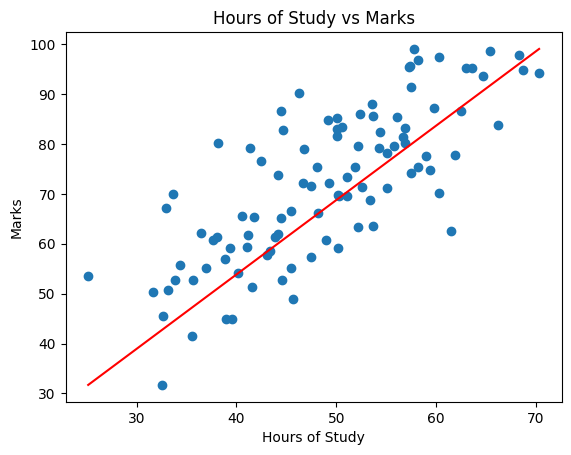

In [11]:
plt.scatter(df["Hours"],df["Marks"])
plt.xlabel("Hours of Study")
plt.ylabel("Marks")
plt.title("Hours of Study vs Marks")
plt.plot([min(df.Hours),max(df.Hours)],[min(df.Marks),max(df.Marks)],color ='Red')

<Axes: >

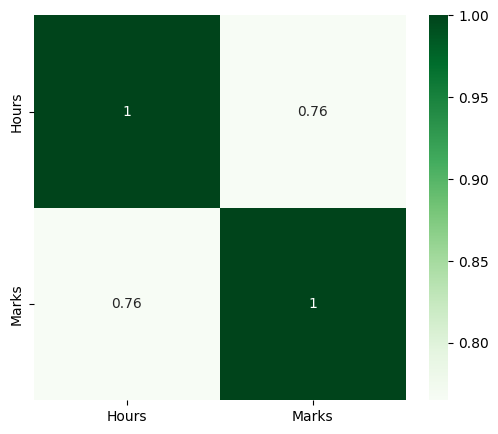

In [12]:
# Above Graph Shows : positive correlation 
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True , cmap="Greens")

# Feature Scalling -> it will scale down each of the value b/w -1 and 1 
## Helpls to increase the accuracy of the model 
* Standardization 
* Normalization

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X = np.array(df.iloc[:,:-1])
Y = np.array(df.iloc[:,-1])

In [15]:
df.head()

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [16]:
X

array([[32.50234527],
       [53.42680403],
       [61.53035803],
       [47.47563963],
       [59.81320787],
       [55.14218841],
       [52.21179669],
       [39.29956669],
       [48.10504169],
       [52.55001444],
       [45.41973014],
       [54.35163488],
       [44.1640495 ],
       [58.16847072],
       [56.72720806],
       [48.95588857],
       [44.68719623],
       [60.29732685],
       [45.61864377],
       [38.81681754],
       [66.18981661],
       [65.41605175],
       [47.48120861],
       [41.57564262],
       [51.84518691],
       [59.37082201],
       [57.31000344],
       [63.61556125],
       [46.73761941],
       [50.55676015],
       [52.22399609],
       [35.56783005],
       [42.43647694],
       [58.16454011],
       [57.50444762],
       [45.44053073],
       [61.89622268],
       [33.09383174],
       [36.43600951],
       [37.67565486],
       [44.55560838],
       [43.31828263],
       [50.07314563],
       [43.87061265],
       [62.99748075],
       [32

In [17]:
stanscale = StandardScaler()  

In [18]:
X = stanscale.fit_transform(X)
Y = stanscale.fit_transform(Y.reshape(-1, 1))

In [19]:
X

array([[-1.69692744e+00],
       [ 4.60783817e-01],
       [ 1.29641497e+00],
       [-1.52894871e-01],
       [ 1.11934400e+00],
       [ 6.37672702e-01],
       [ 3.35493359e-01],
       [-9.96004115e-01],
       [-8.79915004e-02],
       [ 3.70370068e-01],
       [-3.64898398e-01],
       [ 5.56151537e-01],
       [-4.94383049e-01],
       [ 9.49740196e-01],
       [ 8.01118494e-01],
       [-2.52939962e-04],
       [-4.40436632e-01],
       [ 1.16926591e+00],
       [-3.44386604e-01],
       [-1.04578477e+00],
       [ 1.77689413e+00],
       [ 1.69710419e+00],
       [-1.52320603e-01],
       [-7.61297225e-01],
       [ 2.97688891e-01],
       [ 1.07372557e+00],
       [ 8.61215827e-01],
       [ 1.51143924e+00],
       [-2.28998849e-01],
       [ 1.64827489e-01],
       [ 3.36751351e-01],
       [-1.38081742e+00],
       [-6.72528769e-01],
       [ 9.49334875e-01],
       [ 8.81266735e-01],
       [-3.62753460e-01],
       [ 1.33414261e+00],
       [-1.63593389e+00],
       [-1.2

In [20]:
Y

array([[-2.66651176],
       [-0.21538463],
       [-0.62633786],
       [-0.03229448],
       [ 1.00475931],
       [ 0.40839133],
       [ 0.50297376],
       [-0.85054551],
       [ 0.21794595],
       [-0.04854375],
       [-1.11541194],
       [ 0.69054936],
       [-0.66293287],
       [ 0.22202084],
       [ 0.62160848],
       [-0.74791896],
       [ 0.71790058],
       [ 1.67581471],
       [-1.5331961 ],
       [-1.00224427],
       [ 0.78309945],
       [ 1.75590787],
       [-0.9774751 ],
       [-1.3649464 ],
       [ 0.22121292],
       [ 0.180543  ],
       [ 1.54854301],
       [ 1.53362047],
       [ 0.46399128],
       [ 0.75357708],
       [-0.57367894],
       [-2.02475385],
       [ 0.3029835 ],
       [ 1.63545934],
       [ 0.13548623],
       [-0.36015233],
       [ 0.37909756],
       [-1.40938966],
       [-0.65528619],
       [-0.74219   ],
       [-1.27956897],
       [-0.89032789],
       [ 0.71879173],
       [-0.70156137],
       [ 1.53459818],
       [-1

# Spliting the data 

In [21]:
X_train , X_test,Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=10) 

In [22]:
X_train.shape

(80, 1)

In [23]:
Y_test.shape

(20, 1)

In [24]:
from sklearn.svm import SVR

In [25]:
model = SVR(kernel='rbf')

# Train the model

In [26]:
model.fit(X_train , Y_train)

C:\Users\Charanjot Kaur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [27]:
Y_pred=model.predict(X_test)

In [28]:
Y_pred

array([-0.76947139,  0.62495329, -0.36605346, -1.26283815,  0.57381597,
       -0.1185472 , -0.75664008, -0.40417142, -0.99623181,  0.95262628,
        1.07387222,  0.35030893, -0.56328734, -0.52093818,  0.07543078,
        1.22551728,  1.33758452,  0.67596748, -0.56967027, -0.64786557])

In [29]:
Y_test =stanscale.inverse_transform(Y_test.reshape(-1,1))

In [30]:
Y_test

array([[56.87721319],
       [81.43619216],
       [61.4247098 ],
       [50.71958891],
       [85.49806778],
       [71.54663223],
       [44.84712424],
       [58.56982472],
       [62.12457082],
       [70.25193442],
       [62.5623823 ],
       [68.77759598],
       [61.68403752],
       [65.28088692],
       [81.53699078],
       [94.25710159],
       [94.85387123],
       [95.45505292],
       [59.35885025],
       [54.0840548 ]])

In [31]:
Y_pred = stanscale.inverse_transform(Y_pred.reshape(-1,1))

In [32]:
Y_pred

array([[60.39764577],
       [81.48677868],
       [66.49889641],
       [52.93601862],
       [80.71338315],
       [70.24215505],
       [60.59170512],
       [65.92240434],
       [56.96814488],
       [86.44247075],
       [88.27618157],
       [77.33308614],
       [63.51595177],
       [64.15643611],
       [73.17585776],
       [90.56964555],
       [92.26453877],
       [82.25831189],
       [63.41941707],
       [62.23679956]])

Text(0.5, 1.0, 'Actual Marks vs Predicted Marks')

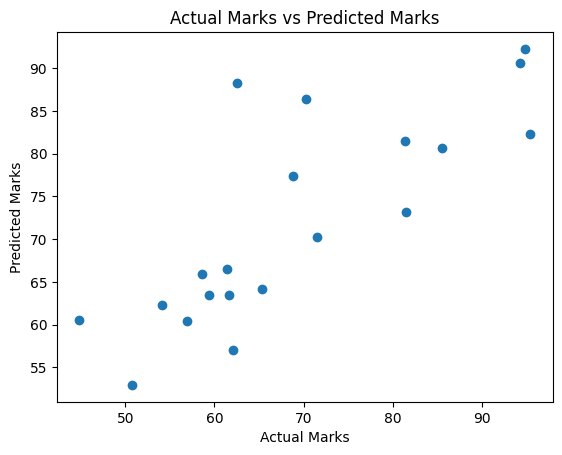

In [33]:
plt.scatter( Y_test,Y_pred)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual Marks vs Predicted Marks")

In [66]:
x=model.predict([[4]])

In [67]:
stanscale.inverse_transform(x.reshape(-1, 1))

array([[345.85075364]])

In [36]:
model.score(X_test , Y_test)

-22.099949752331796

In [37]:
r2_score(Y_test , Y_pred)

0.5943071038285547

In [38]:
mean_squared_error(Y_test,Y_pred)

87.23306900235274

In [39]:
mean_absolute_error(Y_test,Y_pred)

6.933427431006029

In [40]:
df

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


# Without Feature Scaling 

In [41]:
A= np.array(df.iloc[:,:-1])
B = np.array(df.iloc[:,-1])

In [42]:
A.shape

(100, 1)

In [43]:
B.shape

(100,)

In [44]:
B

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319,
       83.87856466, 98.5912173 , 57.25181946, 51.39174408, 75.38065167,
       74.76556403, 95.45505292, 95.22936602, 79.05240617, 83.43207142,
       63.35879032, 41.4128853 , 76.61734128, 96.76956643, 74.08413012,
       66.58814441, 77.76848242, 50.71958891, 62.12457082, 60.81024665,
       52.68298337, 58.56982472, 82.90598149, 61.4247098 , 95.2441528 ,
       45.57058882, 54.0840548 , 87.99445276, 52.72549438, 93.57611869,
       80.16627545, 65.10171157, 65.56230126, 65.28088692, 73.43464155,
       71.13972786, 79.10282968, 86.52053844, 84.74269781, 59.35885025,
       61.68403752, 69.84760416, 86.09829121, 59.10883927, 69.89968164,
       44.86249071, 85.49806778, 95.53668685, 70.25193442, 52.72

In [45]:
A_test , A_train,B_test , B_train = train_test_split(A,B ,test_size= 0.2 , random_state= 10)

In [46]:
model = SVR(kernel='rbf')

In [47]:
model.fit(A_train , B_train)

SVR()

In [48]:
B_pred=model.predict(A_test)

In [49]:
model.score(A_test , B_test)

0.05358952391718241

In [50]:
r2_score(B_test,B_pred)

0.05358952391718241

In [51]:
mean_squared_error(B_test,B_pred)

217.09594713517032

In [52]:
mean_absolute_error(B_test,B_pred)

12.247152327874794

# Linear Regression

In [53]:
model = LinearRegression()

In [54]:
model.fit(A_train , B_train)

LinearRegression()

In [55]:
B_pred=model.predict(A_test)

In [56]:
model.score(A_test , B_test)

0.5061146291537802

In [57]:
r2_score(B_test,B_pred)

0.5061146291537802

In [58]:
mean_squared_error(B_test,B_pred)

113.2917640597655

In [59]:
mean_absolute_error(B_test,B_pred)

8.63848163006108